# Аппроксимация данных. Радиоактивный распад

### Условия задания:


Закон радиоактивного распада, открытый Э.Резерфордом и ф.Содди, утверждает, что активность рпадиоактивного вещетсва уменьшается во временеи по экспоненциальному закону (геометрический прогрессии). Таким образом , активность такого вещества можно характеризовать периодом полураспада - промежутком времени, в течении которого активность уменьшается в 2 раза. Здесь мы приводим данные, опубликованныев работе {Rutherford.E A Radioactivee Substance emitted from Compounds // Philosophical Magazine} Из сосуда с торием был выкачан воздух. В результате была выделена эмананция тория(газ радон-22-, или торон). Для измерения ее ионизирующей способности подавалось напряжение 100В и измерялась сила тока, которая менялась во времени.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
from scipy import linalg

## Начало работы

Создадим два массива x(время) и у(сила тока), хранящие в себе 8 элементов , и построим график по этим данным

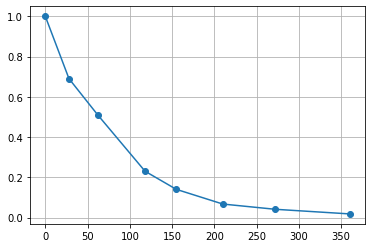

In [2]:
x = np.array([  0.000000000001, 28, 62, 118, 155, 210, 272, 360 ])
y = np.array([  1.00, 0.69, 0.51, 0.23, 0.14, 0.067, 0.041, 0.018 ])
plt.plot(x, y, 'o', color='tab:blue')
plt.plot(x, y)
plt.grid()
pass

Нам нужно восстановить зависимость $y=ce^{\alpha t}$ с помощью метода наименьших квадаратов. $t$ у нас отвечает за время, то есть массив $Х$.
Прологарифмировав данную функцию по основания $e$, мы полкучили функцию:$\ln y = \alpha t + \ln c$ 

 $Y = \ln y$, а $\ln c = \beta$ , то есть $Y = \alpha t+\beta$., с помощью метода наименьших квадратов мы найдем неизвестные $\alpha$ и $\beta$

In [4]:
log_y=np.log(y)
m = len(x)
X = np.stack((np.ones(m), x)).T
beta, residuals, rank, sv = linalg.lstsq(X, log_y)
beta0, beta1 = beta
beta0, beta1

(-0.07535205973302031, -0.011445651432512177)

Мы получили $\alpha$ и $\beta$. Так как $\beta=\ln c$, необходимо найти $c=e^\beta$, а далее подставить $c$ и $\alpha$ в исходную зависимость $y=ce^{\alpha t}$ и вычислить результат.

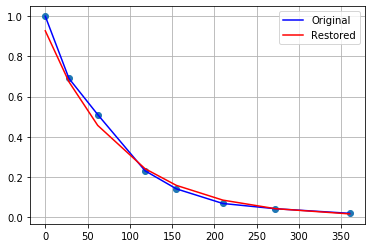

In [6]:
y_fit = np.exp(-0.07535205973302031)*np.exp(-0.011445651432512177*x)
plt.plot(x, y, 'o')
plt.plot(x, y, color = 'blue', label = 'Original')
plt.plot(x, y_fit, color = 'red', label = 'Restored')
plt.legend()
plt.grid()
pass

Найдем погрешность данных двух графиков

In [8]:
sum((y_fit-y)**2)

0.009153418966215104

Как мы видим погрешность очень миинимальна, но она есть, значит, возможно, наши вычесления будут несколько отличаться от данных в интернете

## Радон-220
Радо́н-220, историческое название торо́н (лат. Thoron, обозначается символом Tn), также известный как эманация тория (лат. Thorii Emanatio, обозначается символом ThEm) — радиоактивный нуклид химического элемента радона с атомным номером 86 и массовым числом 220. Имеет период полураспада 55,6(1) с.

Периодом полураспада 
$T$
 радиоактивного материала называется время, необходимое для распада половины первоначального количества вещества. Следовательно, в момент $T$
$N_0/2=N_0e^{-\lambda T}$. 
Формула, как мы видим , имеет похожий вид, что есть у нас. $N_0/2=N_0e^{-\lambda T}$ == $y=ce^{\alpha t}$
Из данной формулы следует , что  $\lambda=-\alpha$, $\lambda=0.011445651432512177

Найдем свой период полураспада Радона-220по формуле $T=\ln2/\lambda$

In [12]:
T=np.log(2)/0.011445651432512177
T

60.55987155008164

Мы получили период полураспада посчитанный нами, он равен $60.55987155008164$. Данные найденные на сайте Википедия показывают, что период полураспада Радона-220 равен $55,6(1) с$. Данные имеет отличие не существенное, но имееют. Чем это может быть вызвано? Впервую очередь,потому что была почитана погрешность, которая повлияла на исход. Так же, возможно метод, использованный нами, более упрощенный и общий, нежели тот, что использовали в интернете при подсчете. Возможно , где то была упрощена или не точно посчитана формула или функция. Но в итоге , мы получили ответ, близко приближенный к реальному.